In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import cPickle as pk
import pandas as pd
import numpy as np
import seaborn as sns

# PATSTAT Data Checks

## Importing
[to top](#Table-of-Contents) 

In [3]:
pwd

u'/Users/Cerigo/Dropbox/Research/Innovation/EPO/Data_processing/Python'

In [4]:
df_nds_lnks_unique = pk.load(open('pickles_and_munged_csv/pre1950_nums_nds_lnks_uniqueOnly.pk', 'rb'))

In [5]:
df_nds_lnks_unique.loc[2010].map(lambda x: x[1]).sort_values()

appln_auth
IS       216
IE      4650
GR      6320
LU     11598
DK     11878
NO     15634
BE     18030
FI     31325
SE     33690
NL     37325
AU     41164
ES     42505
AT     48120
CA     57447
IT     68265
CH     96305
GB    181975
FR    289289
DE    344402
US    658885
JP    690740
Name: 2010, dtype: int64

In [6]:
df_nds_lnks_multi = pk.load(open('pickles_and_munged_csv/pre1950_nums_nds_lnks.pk', 'rb'))

In [7]:
df_nds_lnks_multi.loc[2010].map(lambda x: x[1]).sort_values()

appln_auth
IS         461
IE       11087
GR       12872
DK       27412
NO       42546
BE       53664
LU       75763
FI      108766
NL      115713
SE      125394
ES      136316
AT      181080
AU      188943
CA      263285
IT      415434
CH      461008
GB     1057069
DE     2877838
FR     2942850
JP    17023346
US    18018884
Name: 2010, dtype: int64

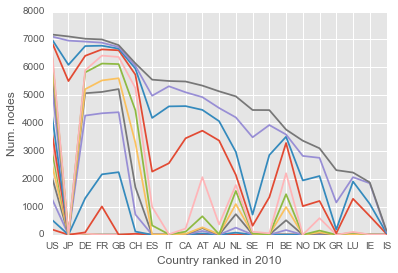

In [31]:
years = range(1840,2020,10)

inx = df_nds_lnks_unique.loc[2010].map(lambda x: x[0]).sort_values(ascending=False).index

for yr in years:
    df_nds_lnks_unique.loc[yr].map(lambda x: x[0]).reindex(inx).plot()
    ax = plt.gca()
    ax.xaxis.set_ticks(range(len(inx)))
    ax.xaxis.set_ticklabels(inx)
    ax.set_xlabel('Country ranked in 2010')
    ax.set_ylabel('Num. nodes')

#plt.savefig('figures/pre1950_dists/nodes_all_on_one_v2.pdf')

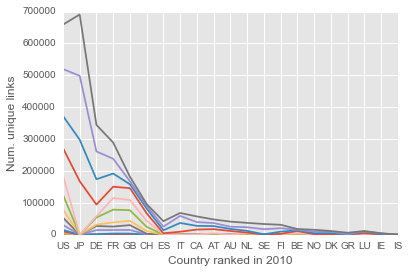

In [33]:
years = range(1840,2020,10)

#inx = df_nds_lnks_unique.loc[2010].map(lambda x: x[1]).sort_values(ascending=False).index

for yr in years:
    df_nds_lnks_unique.loc[yr].map(lambda x: x[1]).reindex(inx).plot()
    ax = plt.gca()
    ax.xaxis.set_ticks(range(len(inx)))
    ax.xaxis.set_ticklabels(inx)
    ax.set_xlabel('Country ranked in 2010')
    ax.set_ylabel('Num. unique links')

#plt.savefig('figures/pre1950_dists/unique_all_on_one.pdf')

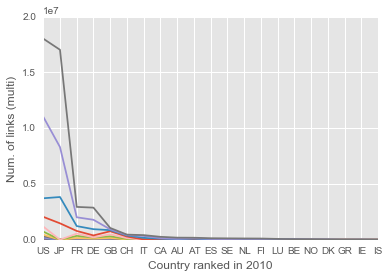

In [15]:
years = range(1840,2020,10)

inx = df_nds_lnks_multi.loc[2010].map(lambda x: x[1]).sort_values(ascending=False).index

for yr in years:
    df_nds_lnks_multi.loc[yr].map(lambda x: x[1]).reindex(inx).plot()
    ax = plt.gca()
    ax.xaxis.set_ticks(range(len(inx)))
    ax.xaxis.set_ticklabels(inx)
    ax.set_xlabel('Country ranked in 2010')
    ax.set_ylabel('Num. of links (multi)')

#plt.savefig('figures/pre1950_dists/multi_all_on_one.pdf')

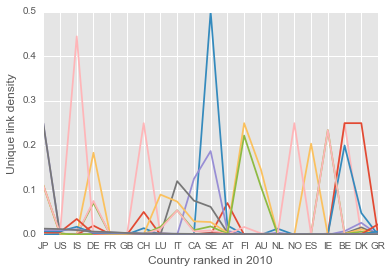

In [22]:
def get_density(nds_lnks):
    if nds_lnks[0] == 0:
        return 0
    return (nds_lnks[1]/float(nds_lnks[0]**2))

years = range(1840,2020,10)

inx = df_nds_lnks_unique.loc[yr].map(get_density).sort_values(ascending=False).index

for yr in years:
    df_nds_lnks_unique.loc[yr].map(get_density).reindex(inx).plot()
    ax = plt.gca()
    ax.xaxis.set_ticks(range(len(inx)))
    ax.xaxis.set_ticklabels(inx)
    ax.set_xlabel('Country ranked in 2010')
    ax.set_ylabel('Unique link density')

#plt.savefig('figures/pre1950_dists/unique_density_all_on_one_v2.pdf')

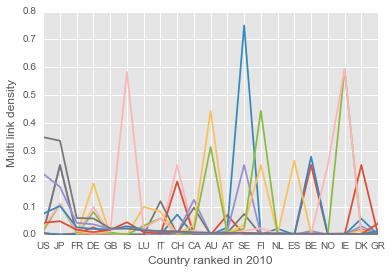

In [23]:
def get_density(nds_lnks):
    if nds_lnks[0] == 0:
        return 0
    return (nds_lnks[1]/float(nds_lnks[0]**2))

years = range(1840,2020,10)

inx = df_nds_lnks_multi.loc[yr].map(get_density).sort_values(ascending=False).index

for yr in years:
    df_nds_lnks_multi.loc[yr].map(get_density).reindex(inx).plot()
    ax = plt.gca()
    ax.xaxis.set_ticks(range(len(inx)))
    ax.xaxis.set_ticklabels(inx)
    ax.set_xlabel('Country ranked in 2010')
    ax.set_ylabel('Multi link density')

#plt.savefig('figures/pre1950_dists/multi_density_all_on_one_v2.pdf')

In [ ]:
years = range(1840,2020,10)

for yr in years:
    df_nds_lnks_multi.loc[yr].map(lambda x: x[1]).sort_values(ascending=False).plot()
    ax = plt.gca()
    ax.xaxis.set_ticks(range(len(df_nds_lnks_multi.loc[yr].map(lambda x: x[1]).sort_values(ascending=False))))
    ax.xaxis.set_ticklabels(df_nds_lnks_multi.loc[yr].map(lambda x: x[1]).sort_values(ascending=False).index)
    ax.set_xlabel('Country ranked in 2010')
    ax.set_ylabel('Num. of links (multi)')

#plt.savefig('figures/pre1950_dists/multi_all_on_one.pdf')

In [25]:
cntrs_ord_node_2010 = df_nds_lnks_multi.loc[2010].map(lambda x: x[0]).sort_values(ascending=False).index.values

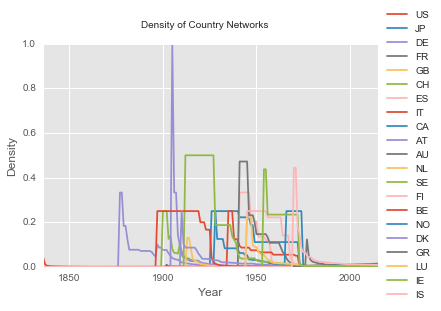

In [46]:
plt.figure()#figsize=(10,5))
for col in cntrs_ord_node_2010:
    df_nds_lnks_unique.applymap(get_density)[col].plot()
ax = plt.gca()
#ax.set_yscale('log')
plt.ylabel('Density')
plt.xlabel('Year')
plt.suptitle('Density of Country Networks')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#ax.set_position([0.1,0.1,0.6,0.8])
plt.savefig('figures/pre1950_dists/densties.pdf')